# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import helper
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST("~/.pytorch/F_MNIST_data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

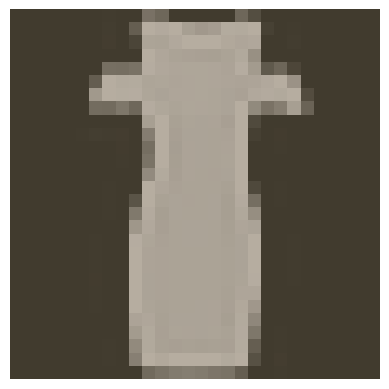

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
# TODO: Define your network architecture here
import torch.nn as nn
import torch.nn.functional as F

class FashionMNISTNetwork(nn.Module):
    def __init__(self):
        super(FashionMNISTNetwork, self).__init__()
        
        # Define the layers
        self.fc1 = nn.Linear(784, 128)  # First hidden layer: input 784 features, output 128 features
        self.fc2 = nn.Linear(128, 64)   # Second hidden layer: input 128 features, output 64 features
        self.fc3 = nn.Linear(64, 10)    # Output layer: input 64 features, output 10 features (classes)

    def forward(self, x):
        # Flatten the input
        x = x.view(x.shape[0], -1)
        
        # Pass through first hidden layer + ReLU activation
        x = F.relu(self.fc1(x))
        
        # Pass through second hidden layer + ReLU activation
        x = F.relu(self.fc2(x))
        
        # Output layer with Log-Softmax activation
        x = F.log_softmax(self.fc3(x), dim=1)
        
        return x

# Create the network instance
model = FashionMNISTNetwork()


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [5]:
# TODO: Create the network, define the criterion and optimizer
from torch import optim
# Initialize the model, criterion, and optimizer
model = FashionMNISTNetwork()

# Criterion (loss function) - CrossEntropyLoss combines Softmax and NLLLoss
criterion = nn.CrossEntropyLoss()

# Optimizer - Using SGD with momentum
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)


In [6]:
# TODO: Train the network here
# Number of epochs for training
epochs = 5

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass: Get the output from the network
        output = model(images)
        
        # Calculate the loss
        loss = criterion(output, labels)
        
        # Backward pass: Calculate the gradients
        loss.backward()
        
        # Update the model weights
        optimizer.step()
        
        # Accumulate the loss for this batch
        running_loss += loss.item()

    # Print the average loss for this epoch
    print(f"Epoch {epoch+1}/{epochs} - Training loss: {running_loss/len(trainloader)}")


Epoch 1/5 - Training loss: 0.7251731830238025
Epoch 2/5 - Training loss: 0.45216047889324645
Epoch 3/5 - Training loss: 0.40750195669022193
Epoch 4/5 - Training loss: 0.37825349124192176
Epoch 5/5 - Training loss: 0.35806997405535884


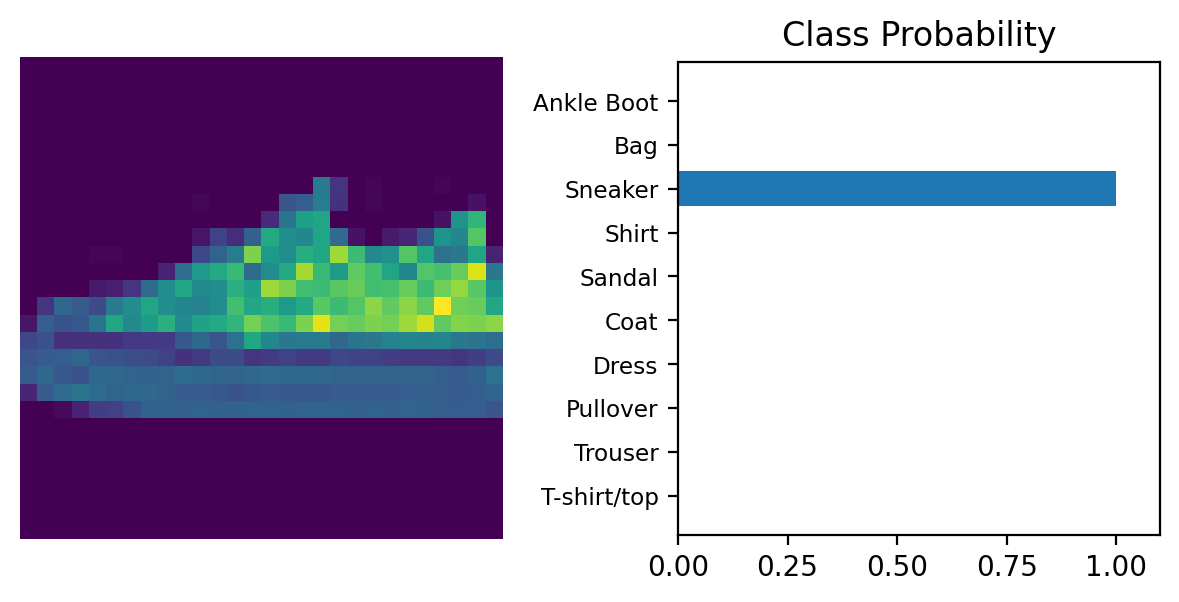

In [8]:
# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Pass the image through the network to get the logits
logits = model(img)

# Convert logits to class probabilities using softmax
ps = torch.exp(logits)  # Apply the softmax function

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version="Fashion")
